# Usage

In [47]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from alpha_clustering.alpha_complex import AlphaComplex2D, AlphaComplex3D, AlphaComplexND
from alpha_clustering.cluster import Cluster
from alpha_clustering.plot import Plot
from alpha_clustering.io_handler import IOHandler

# Unnecessary plot settings. Just has a better look.
sns.set_style(style = "white")
# Axes line style.
plt.rcParams["axes.edgecolor"] = (0.33, 0.32, 0.29)
# Ticks styles.
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["xtick.color"] = (0.33, 0.32, 0.29)
plt.rcParams["ytick.color"] = (0.33, 0.32, 0.29)
# Axes labels.
plt.rcParams["axes.labelcolor"] = (0.33, 0.32, 0.29)
plt.rcParams["axes.labelweight"] = "bold"
# Remove the top and right frame lines.
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# Remove the box around the legend.
plt.rcParams["legend.frameon"] = False
# Set the grid in 3d plots.
plt.rcParams["axes3d.grid"] = False

## The Complex

### AlphaComplex2D

INFO 	 15-12-22 11:30:12 Finding the α-complex for given point set with α = -0.05...
INFO 	 15-12-22 11:30:12 Constructed the delaunay triangulation with furthest_site = False and 1980 simplices.
INFO 	 15-12-22 11:30:12 α-complex with 3110 simplices generated.


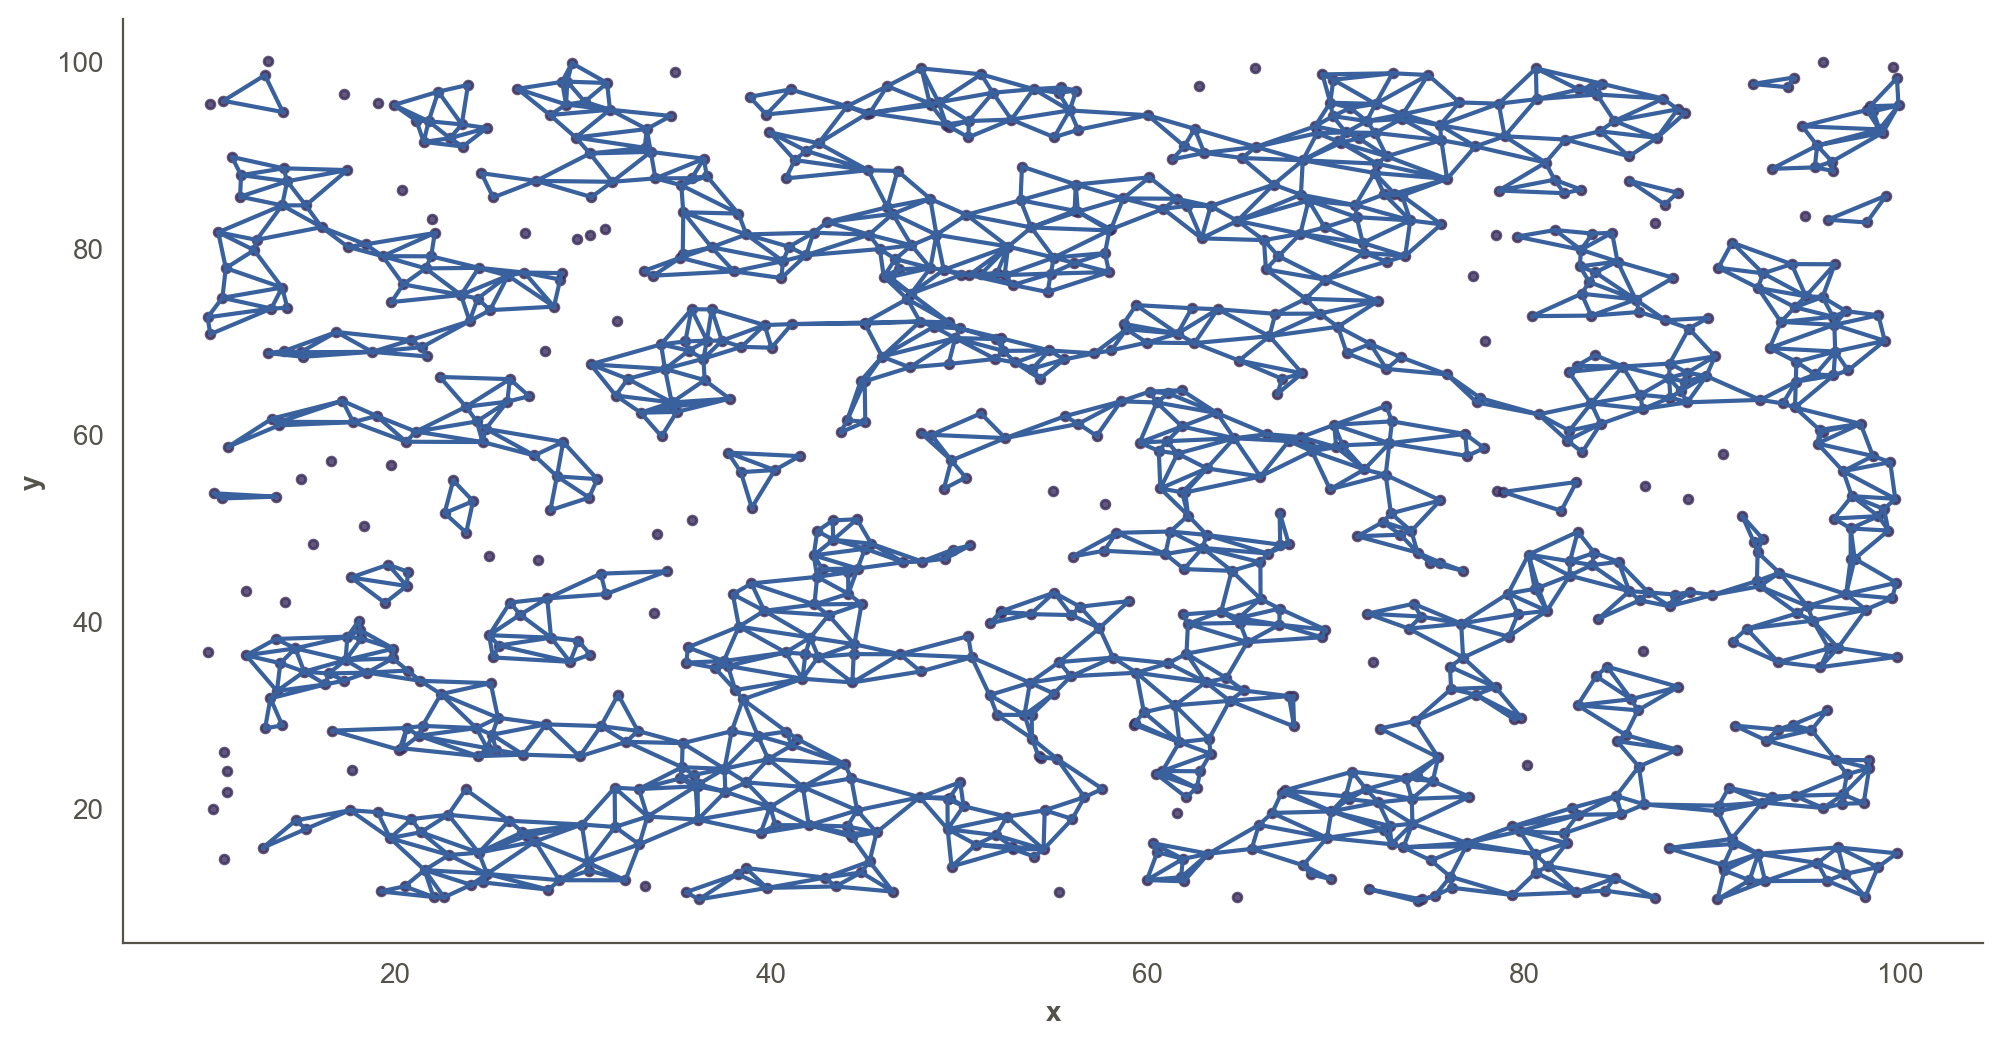

In [48]:
data = 90 * np.random.default_rng().random(size = (1000, 2)) + 10
ac = AlphaComplex2D(data)
ac.predict(alpha = -0.05)

# Visualize the alpha complex.
triangles = next(simplices for simplices in ac.get_complex if simplices.shape[1] == 3)
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200)
ax.scatter(
    *data.T,
    s = 10.0,
    color = sns.color_palette("mako", 50)[10],
    alpha = 0.8
)
ax.triplot(
    *data.T,
    triangles = triangles,
    color = sns.color_palette("mako", 50)[20]
)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()



### AlphaComplex3D

INFO 	 15-12-22 11:30:38 Constructed the delaunay triangulation with furthest_site = False and 6298 simplices.
INFO 	 15-12-22 11:30:38 α-complex with 16906 simplices generated.


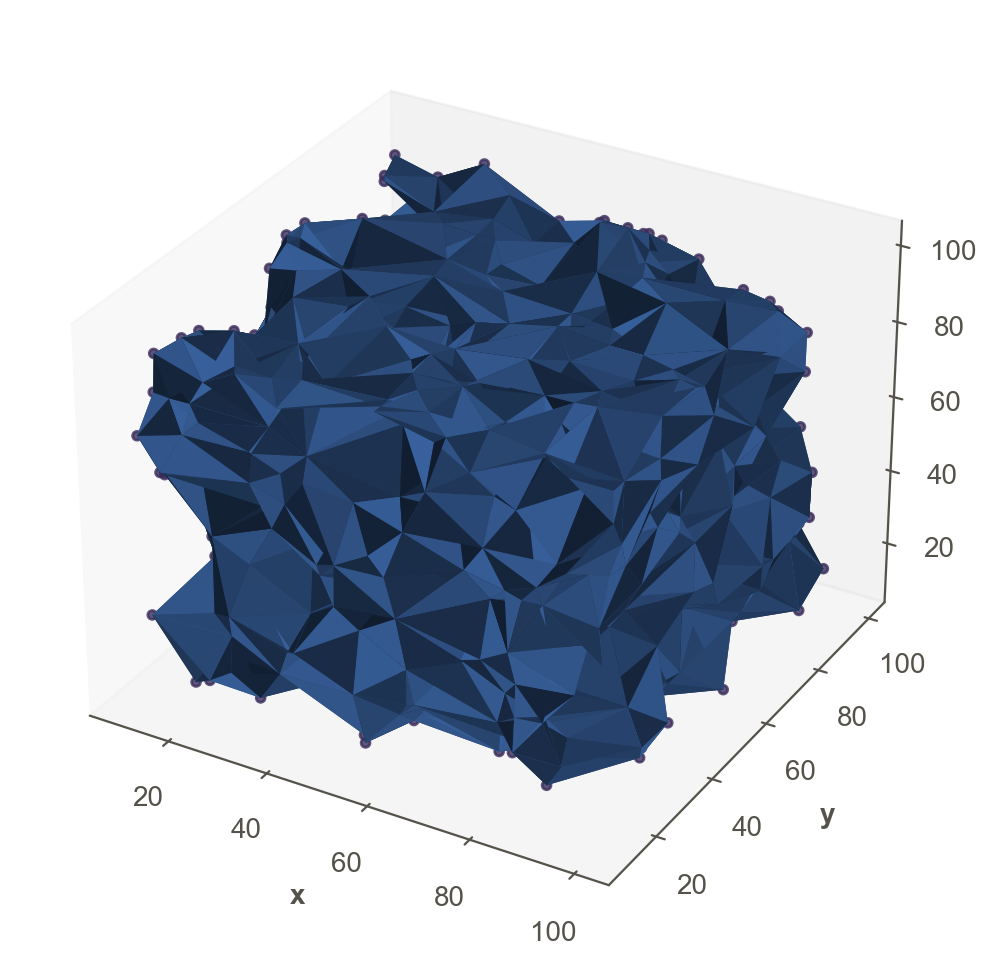

In [51]:
# Generate some random 3D data.
data = 90 * np.random.default_rng().random(size = (1000, 3)) + 10
# Construct the complex.
ac = AlphaComplex3D(data)
ac.fit()
ac.predict(alpha = 0.1)

# Visualize the alpha complex.
triangles = next(simplices for simplices in ac.get_complex if simplices.shape[1] == 3)
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200, subplot_kw = {"projection": "3d"})
ax.scatter(
    *data.T,
    s = 10.0,
    color = sns.color_palette("mako", 50)[10],
    alpha = 0.8
)
ax.plot_trisurf(
    *data.T,
    triangles = triangles,
    linewidth = 0.0,
    color = sns.color_palette("mako", 50)[20]
)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


### AlphaComplexND

INFO 	 15-12-22 12:28:44 Constructed the delaunay triangulation with furthest_site = False and 6312 simplices.
INFO 	 15-12-22 12:28:44 α-complex with 21963 simplices generated.


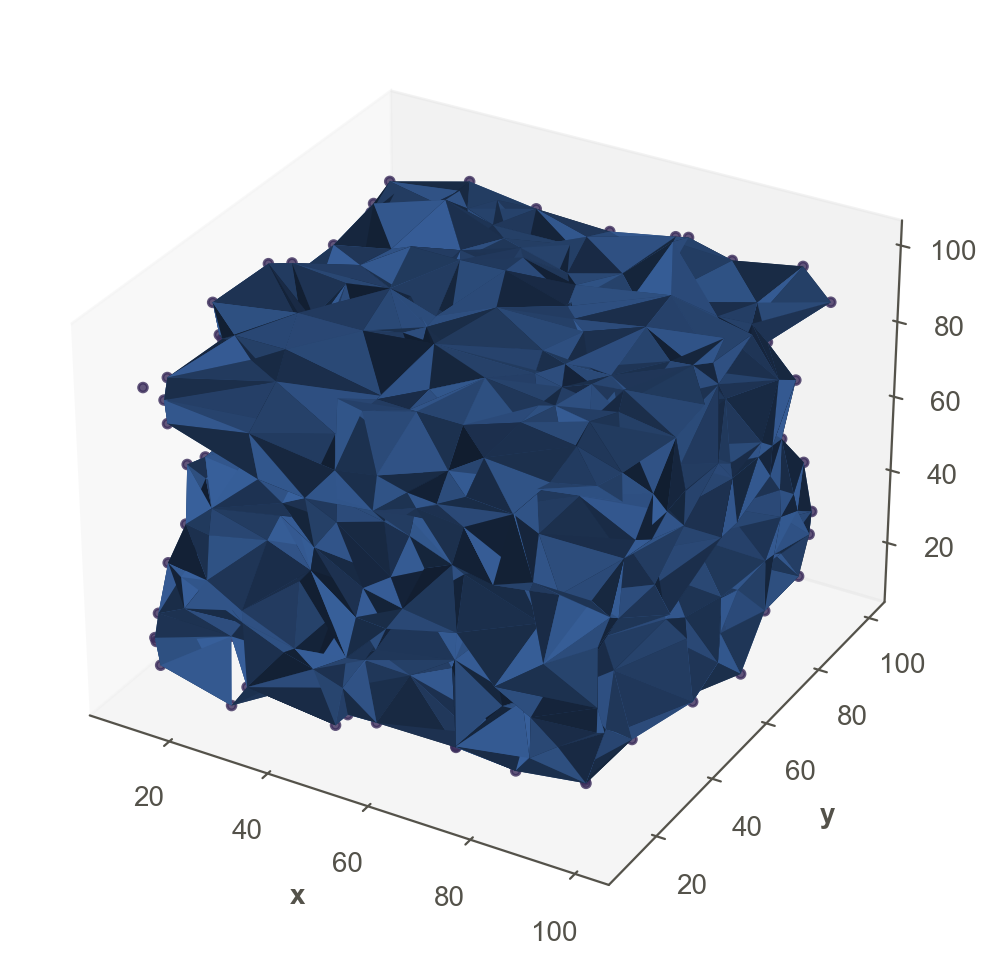

In [82]:
# The ND interface can be used for data where N >= 2 (it's a drop in replacement for the previous examples).
data = 90 * np.random.default_rng().random(size = (1000, 3)) + 10

# Construct the complex.
ac = AlphaComplexND(data)
ac.fit()
ac.predict(alpha = 0.1)

# Visualize the alpha complex.
triangles = next(simplices for simplices in ac.get_complex if simplices.shape[1] == 3)
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200, subplot_kw = {"projection": "3d"})
ax.scatter(
    *data.T,
    s = 10.0,
    color = sns.color_palette("mako", 50)[10],
    alpha = 0.8
)
ax.plot_trisurf(
    *data.T,
    triangles = triangles,
    linewidth = 0.0,
    color = sns.color_palette("mako", 50)[20]
)

ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

## Clustering

In [ ]:
!curl -O https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/hepta.arff

INFO 	 15-12-22 11:56:39 Constructed the delaunay triangulation with furthest_site = False and 1212 simplices.
INFO 	 15-12-22 11:56:39 α-complex with 2959 simplices generated.
INFO 	 15-12-22 11:56:39 Fitting the cluster model...
INFO 	 15-12-22 11:56:39 Predicting the clusters using the α-complex...


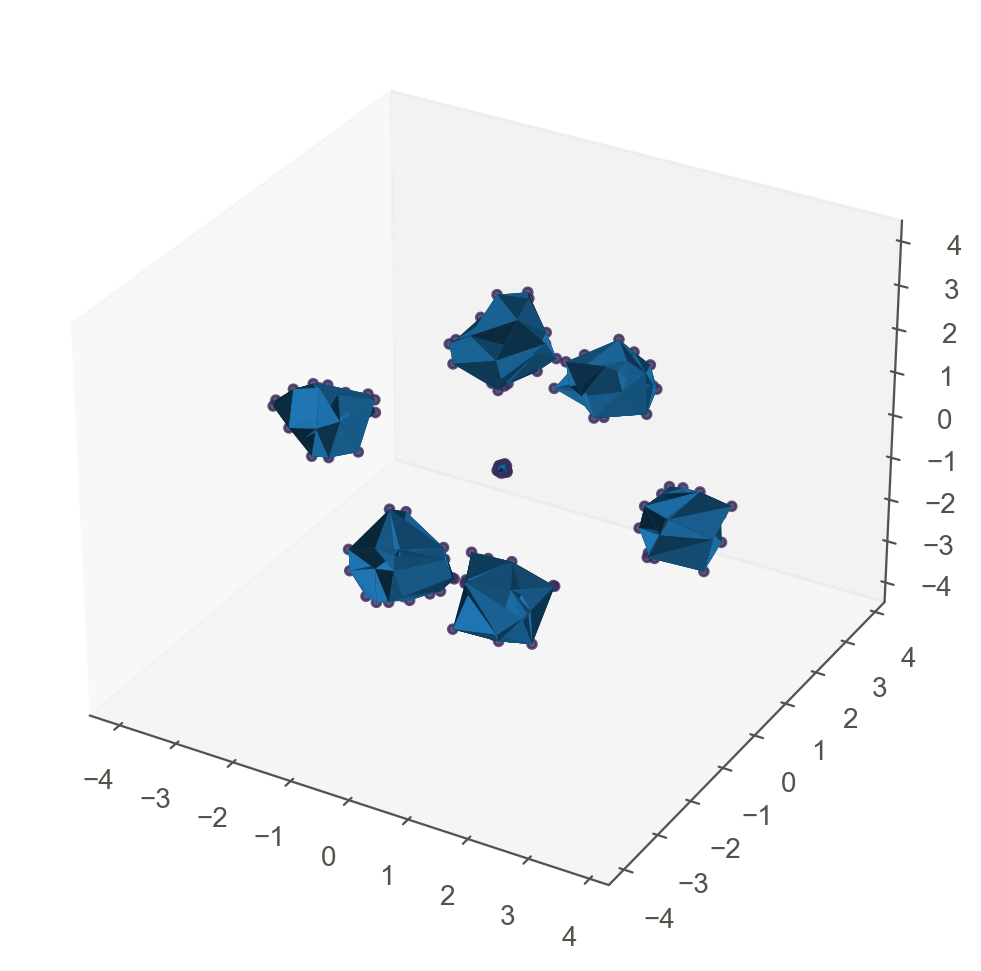

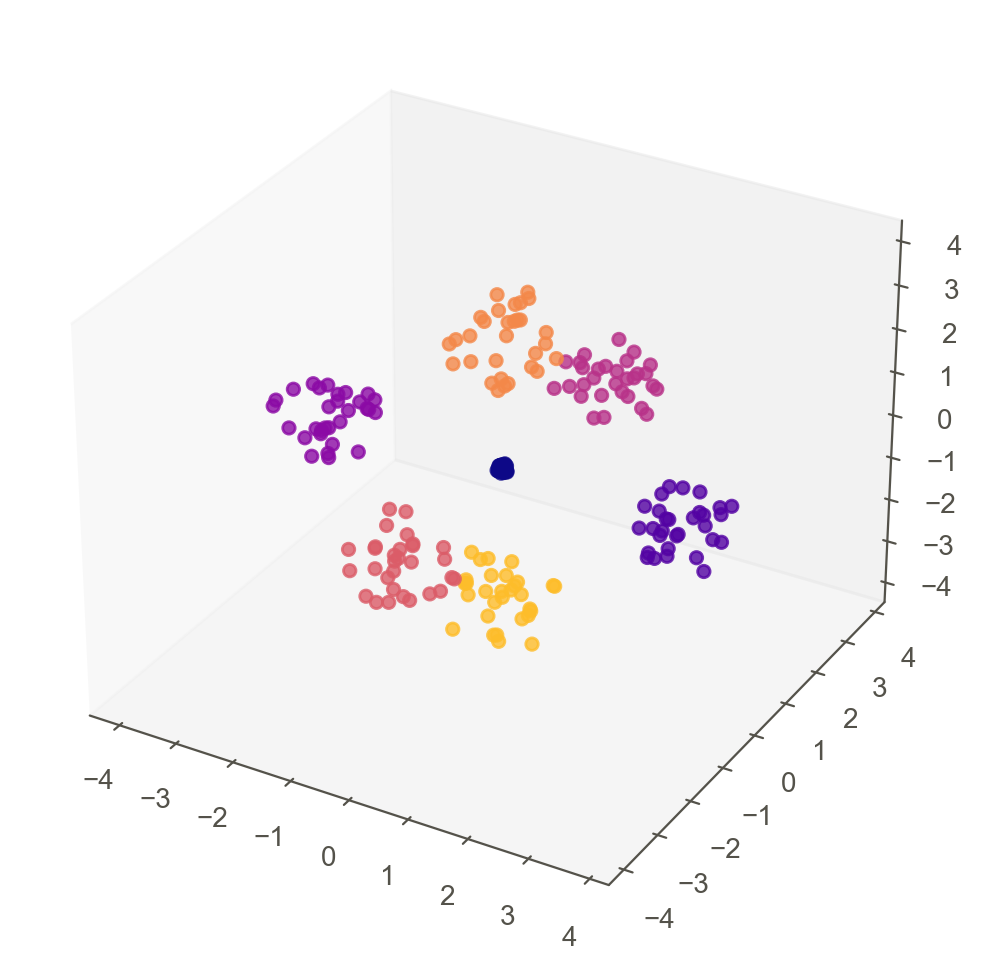

In [81]:
from scipy.io import arff

data = arff.loadarff("hepta.arff")
data = pd.DataFrame(data[0])

vertices = data.iloc[:, : -1].to_numpy()
# The labels is in bytes. We need to convert them to integers.
# This might be different depending on from where the data is sourced.
labels = data.iloc[:, -1].apply(lambda x: int(x))
# For convenience we also get the number of ground truth clusters.
n_clusters = labels.nunique()

# We first construct the complex.
ac = AlphaComplexND(vertices)
ac.fit()
ac.predict(alpha = 1.5)

# We can now visualize the complex.
triangles = next(simplices for simplices in ac.get_complex if simplices.shape[1] == 3)
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200, subplot_kw = {"projection": "3d"})
ax.scatter(
    *vertices.T,
    s = 10.0,
    color = sns.color_palette("mako", 50)[10],
    alpha = 0.8
)
ax.plot_trisurf(
    *vertices.T,
    triangles = triangles,
    linewidth = 0.0,
)


# We then cluster the complex.
cluster = Cluster(ac.get_complex)
cluster.fit()
clusters = cluster.predict()

# We can now visualize the clusters.
fig, ax = plt.subplots(figsize = (12, 6), dpi = 200, subplot_kw = {"projection": "3d"})
cm = plt.get_cmap("plasma")
ax.set_prop_cycle("color", [cm(1. * i / n_clusters) for i in range(n_clusters)])

for i, c in enumerate(clusters):
    # Each cluster is a Python set.
    # To use it as an index convert it.
    ax.scatter(
        *vertices[list(c)].T,
        alpha = 0.8,
        label = f"Cluster {i}"
    )

plt.show()